In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


In [3]:
cifar_10_classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]


(-0.5, 31.5, 31.5, -0.5)

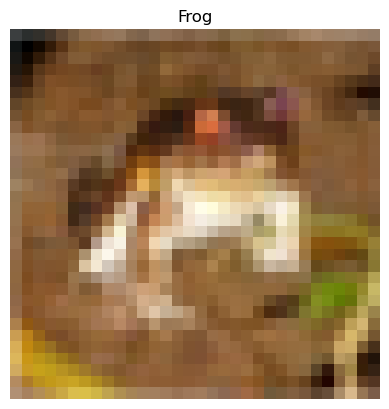

In [5]:
x_train.shape


import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(cifar_10_classes[y_train[0][0]])
plt.axis("off")

In [6]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [7]:

one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()


In [8]:
softmax_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])


softmax_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-06-18 18:05:39.494330: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-06-18 18:05:39.494603: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-18 18:05:39.494613: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-18 18:05:39.494919: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-18 18:05:39.495344: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localho

In [9]:
softmax_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20


2024-06-18 18:05:52.643013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2752 - loss: 2.0407 - val_accuracy: 0.3634 - val_loss: 1.8182
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3552 - loss: 1.8458 - val_accuracy: 0.3385 - val_loss: 1.8514
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3705 - loss: 1.8087 - val_accuracy: 0.3562 - val_loss: 1.8433
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3742 - loss: 1.8063 - val_accuracy: 0.3649 - val_loss: 1.8524
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3800 - loss: 1.7929 - val_accuracy: 0.3838 - val_loss: 1.7670
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3885 - loss: 1.7806 - val_accuracy: 0.3543 - val_loss: 1.8661
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3901 - loss: 1.7725 - val_accuracy: 0.3720 - val_loss: 1.7913
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3966 - loss: 1.7474 - val_accuracy: 0.3838 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


'Ship'

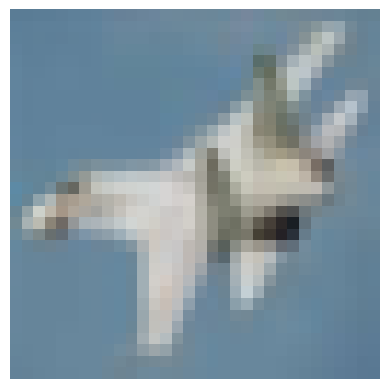

In [11]:
new_image = x_test[10]
plt.imshow(new_image)
plt.axis("off")

img = np.expand_dims(new_image, axis=0)

img.shape

pred = softmax_model.predict(img)



pred

prediction = np.argmax(pred)
cifar_10_classes[prediction]
